# **1.Horário**
**Trabalho 1**  
**Pedro Gomes a91647**  
**Francisco Teófilo a93741**

Iremos construir um horário semanal para o plano de reuniões de projeto de uma “StartUp”.

Usaremos a biblioteca [OR-Tools](https://developers.google.com/optimization) para fazer a interface para o SCIP, utilizando este comando para a instalar `pip install ortools`.

In [150]:
!pip install ortools

$(p,s,d,t,c) \in [0..D-1]\times[0..T-1]\times[0..S-1]\times[0..P-1]\times[0..C-1]$

> $\forall_{d,t,s,p,c}\cdot r[(d,t,s,p,c)] \in \{0,1\}$  

O input da função que cria um horário é:   
Uma lista $(P,S,D,T,C,L,CP)$  
Projeto -> P  
Salas -> S   
Dia -> D  
Tempo -> T  
Colaboradores -> C  
Lider -> L  
Colaboradores por projeto -> CP

# Restrições:
1-Cada sala durante um “slot” (tempo,dia), tem um projeto.  
2-Cada projeto tem no máximo uma reunião por (dia,tempo).  
3-Cada colaborador só participa na sala do seu projeto de um slot (dia,tempo).
4-Cada reunião tem associado um projeto e um conjunto de colaboradores.  
5-Cada projeto tem associado um conjunto de colaboradores, dos quais um é o líder.  
6-O líder do projeto participa em todas as reuniões do seu projeto.  
7-50% do total de colaboradores do projeto  

**Solver**  
Função utilizada para resolver e posteriormente fazer print do horário preenchido.
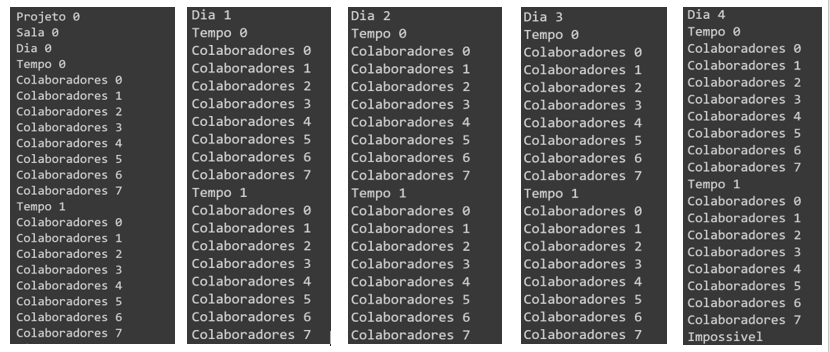

In [ ]:
#Projeto -> P
#Salas -> S 
#Dia -> D
#Tempo -> T
#colaboradores -> C
#Lider -> L
#Colaboradores por projeto -> CP

from ortools.linear_solver import pywraplp

#horario(projeto,sala,dia,tempo,lider,colaboradores)
def horario(P,S,D,T,C,L,CP): 
  solver = pywraplp.Solver.CreateSolver('SCIP')
  r={}

  for p in range(P):
    print("Projeto",p)
    for s in range(S):
      print("Sala",s)
      for d in range(D):
        print("Dia",d)
        for t in range(T):
          print("Tempo",t) 
          for c in range(C):
            print("Colaboradores",c)
            r[p,s,d,t,c] = solver.BoolVar("r[%i,%i,%i,%i,%i]" % (p,s,d,t,c))

  #Restricoes
  #1-Cada sala durante um “slot” (tempo,dia), tem um projeto.
  for s in range(S):
    for d in range(D):
      for t in range(T):
        solver.Add(sum(r[p,s,d,t,c] for p in range(P) for cp in CP) <= 1)
  #2-Cada projeto tem no máximo uma reunião por (dia,tempo).
  for p in range(P):
    for d in range(D):
      for t in range(T):
        solver.Add(sum(r[p,s,d,t,c] for s in range(S) for cp in CP) <= 1)
  #3-Cada colaborador só participa na sala do seu projeto de um slot (dia,tempo).
  for s in range(S):
    for d in range(D):
      for t in range(T):
        for p in range(P):
          for cp in CP:
            solver.Add(sum([r[p,s,d,t,c] for s in range(S)]) <= 1)
  #4-Cada reunião tem associado um projeto e um conjunto de colaboradores.
  for c in range(C):
    solver.Add(sum([r[p,s,d,t,c] for p in range(P)]) <= 1)  
  #5-Cada projeto tem associado um conjunto de colaboradores, dos quais um é o líder.
  for p in range(P):
    for c in range(C):
      solver.Add(sum(r[p,s,d,t,c] for cp in CP[p] for l in L[p]) == 1)
  #6-O líder do projeto participa em todas as reuniões do seu projeto.
  for p in range(P):
    for s in range(S):
      for d in range(D):
        for t in range(T):
          for c in range (C):
            solver.Add(r[p,s,d,t,c] == 1 )
  #7-50% do total de colaboradores do projeto
  for s in range(S):
    for d in range(D):
      for t in range(T):
        for p in range(P):
          solver.Add(sum(r[p,s,d,t,c] for c in CP[p]) >= 2 * len(L))

  #print
  status = solver.Solve()
  if status == pywraplp.Solver.OPTIMAL:
    for p in range(P):
      print("Projeto",p)
      for s in range(S):
        print("Sala",s)
        for d in range(D):
          print("Dia",d)
          for t in range(T):
            print("Tempo",t,end='')
            for c in range(C):
              print('Colaboradores',c)
              if round(r[p,s,d,t,c].solution_value())==1:
                print(',',c,end='')
  else:
    print("Impossivel")
  print()

horario(2,2,5,2,8,{0:{3},1:{7}},{0:{0,1,2},1:{4,5,6}})